In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# acquire information
url='https://gist.githubusercontent.com/ryanorsinger/19bc7eccd6279661bd13307026628ace/raw/e4b5d6787015a4782f96cad6d1d62a8bdbac54c7/lemonade.csv'
df = pd.read_csv(url)
df

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
0,1/1/17,Sunday,27.0,2.00,15,0.5,10
1,1/2/17,Monday,28.9,1.33,15,0.5,13
2,1/3/17,Tuesday,34.5,1.33,27,0.5,15
3,1/4/17,Wednesday,44.1,1.05,28,0.5,17
4,1/5/17,Thursday,42.4,1.00,33,0.5,18
...,...,...,...,...,...,...,...
360,12/27/17,Wednesday,42.7,1.00,33,0.5,19
361,12/28/17,Thursday,37.8,1.25,32,0.5,16
362,12/29/17,Friday,39.5,1.25,17,0.5,15
363,12/30/17,Saturday,30.9,1.43,22,0.5,13


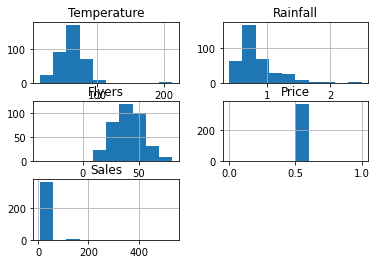

In [9]:
# check distribution
df.hist()
plt.show()

In [10]:
# check null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         365 non-null    object 
 1   Day          365 non-null    object 
 2   Temperature  365 non-null    float64
 3   Rainfall     365 non-null    float64
 4   Flyers       365 non-null    int64  
 5   Price        365 non-null    float64
 6   Sales        365 non-null    int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 20.1+ KB


In [11]:
# key takeaway
# There is zero null values, the distribution seems abnormal

In [12]:
# create a function to call lower bound and upper bounds
def get_lower_and_upper_bounds(col, mult=1.5):
    q1 = col.quantile(0.25)
    q3 = col.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - mult * iqr
    upper_bound = q3 + mult * iqr
    return lower_bound,upper_bound

In [13]:
lower_bound,upper_bound=get_lower_and_upper_bounds(df,mult=1.5)

In [5]:
# lower bound
lower_bound
# the lower bound with 1.5 multiplier seems normal and nothing significant to determine there is anomaly

Temperature    16.70
Rainfall        0.26
Flyers          4.00
Price           0.50
Sales           5.00
dtype: float64

In [6]:
# upper bound
upper_bound
# the upper bound price seems odd, the price seems like it is constantly in 0.5

Temperature    104.7
Rainfall         1.3
Flyers          76.0
Price            0.5
Sales           45.0
dtype: float64

In [7]:
# check if the mult is 3
lower_bound,upper_bound=get_lower_and_upper_bounds(df,mult=3)

In [8]:
# lower bound
lower_bound
# the lower boudn is abnormal, due to rainfall is negative, sales is negative

Temperature   -16.30
Rainfall       -0.13
Flyers        -23.00
Price           0.50
Sales         -10.00
dtype: float64

In [9]:
# upper bound
upper_bound
# The temperature is abnormal, which is 137 degree

Temperature    137.70
Rainfall         1.69
Flyers         103.00
Price            0.50
Sales           60.00
dtype: float64

/var/folders/3k/kd9rcxws7ygft2krzxncw_400000gn/T/ipykernel_8185/1535375055.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df[df.mean()-2*df.std()>=df]
/var/folders/3k/kd9rcxws7ygft2krzxncw_400000gn/T/ipykernel_8185/1535375055.py:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df[df.mean()-2*df.std()>=df]


,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
0,NaN,NaN,NaN,NaN,NaN,0.5,NaN
1,NaN,NaN,NaN,NaN,NaN,0.5,NaN
2,NaN,NaN,NaN,NaN,NaN,0.5,NaN
3,NaN,NaN,NaN,NaN,NaN,0.5,NaN
4,NaN,NaN,NaN,NaN,NaN,0.5,NaN
...,...,...,...,...,...,...,...
360,NaN,NaN,NaN,NaN,NaN,0.5,NaN
361,NaN,NaN,NaN,NaN,NaN,0.5,NaN
362,NaN,NaN,NaN,NaN,NaN,0.5,NaN
363,NaN,NaN,NaN,NaN,NaN,0.5,NaN
